## Build Decision Tree Model&

In [43]:
# Basic pacakges are imported for fundamental process.

import pandas as pd
import numpy as np
import scipy as sp
import sklearn

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import tree
import graphviz

from sklearn.metrics import accuracy_score,precision_score, recall_score

from matplotlib.colors import ListedColormap

from sklearn import neighbors, datasets
import itertools
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score

In [44]:
url = r'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url, header = None, 
                 names=["id","diagnosis","radius_mean",
                        "texture_mean","perimeter_mean","area_mean",
                        "smoothness_mean","compactness_mean","concavity_mean",
                        "concave_points_mean","symmetry_mean","fractal_dimension_mean",
                        "radius_se","texture_se","perimeter_se",
                        "area_se","smoothness_se","compactness_se",
                        "concavity_se","concave points_se","symmetry_se",
                        "fractal_dimension_se","radius_worst","texture_worst",
                        "perimeter_worst","area_worst","smoothness_worst",
                        "compactness_worst","concavity_worst","concave_points_worst",
                        "symmetry_worst","fractal_dimension_worst"]
                )

df['id'] = df['id'].apply(str)

# Retrieving Attributes
X = df.iloc[:, 2:33] # keep specific attributes 

# Retriving Target Variable
y = df.loc[:, "diagnosis"].replace({'B':0, 'M':1})

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42,
                                                    stratify = y)
print('The size of training set is ',X_train.shape,y_train.shape)  
print('The size of testing set is ',X_test.shape,y_test.shape) 

The size of training set is  (426, 30) (426,)
The size of testing set is  (143, 30) (143,)


In [73]:
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold

inner_cv = KFold(n_splits = 5, shuffle=True)
outer_cv = KFold(n_splits = 5, shuffle=True)

from sklearn.tree import DecisionTreeClassifier
# Choosing depth of the tree AND splitting criterion AND min_samples_leaf AND min_samples_split

gs_DT = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                  param_grid = [{'criterion' : ['gini', 'entropy'],
                               'max_depth' : range(2,15,1),
                               'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
                               'min_samples_split' : [2,3,4,5,6,7,8,9,10]
                                }],
                  scoring = 'f1_weighted', 
                  cv = inner_cv)

gs_DT = gs_DT.fit(X,y)
print("Non-nested CV f1: ", gs_DT.best_score_)
# Parameter setting that gave the best results on the hold out data.
print("Optimal Parameter: ", gs_DT.best_params_)    
# Estimator that was chosen by the search, i.e. estimator which gave highest score
print("Optimal Estimator: ", gs_DT.best_estimator_) 
nested_score_gs = cross_val_score(gs_DT, X = X, y = y, cv = outer_cv)
print("Nested CV f1: ",nested_score_gs.mean(), " +/- ", nested_score_gs.std())

Parameter Tuning #1
Non-nested CV f1:  0.9470621244218462
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Nested CV f1:  0.9276020088529762  +/-  0.029231815601976897




```
## This is formatted as code
```

## The original logistic model

In [ ]:
#read data
from urllib.request import urlopen
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn import linear_model      
import warnings
warnings.filterwarnings('ignore')

link = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
data = urlopen(link)
data = pd.read_csv(data, sep=',', 
                  names = ["ID_number","Diagnosis","radius_mean","texture_mean","perimeter_mean",
                           "area_mean","smoothness_mean","compactness_mean","concavity_mean",
                           "concave_points_mean","symmetry_mean","fractal_dimension_mean","radius_se",
                           "texture_se","perimeter_se","area_se","smoothness_se","compactness_se",
                           "concavity_se","concave_points_se","symmetry_se","fractal_dimension_se",
                           "radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst",
                           "compactness_worst","concavity_worst", "concave_points_worst",
                           "symmetry_worst","fractal_dimension_worst"])
#data.describe()


In [ ]:
#load packages 
from __future__ import division, print_function, unicode_literals
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

#simple cleaning checking for null values
data.isnull().sum()

#define X and y
X =data.iloc[:,2:]  
y =data.iloc[:,1]
y = data.loc[:, "Diagnosis"].replace({'B':0, 'M':1})

In [ ]:
np.random.seed(42)
# Split data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

#Create a classifier-logistic 
clf = linear_model.LogisticRegression(multi_class='auto',C=1e5) #some parameters can modify here later 

#Train the model
#Take a look at estimated coefficients 
clf = clf.fit(X_train, y_train)
print('The weights of the attributes are:', clf.coef_)

#Apply the Logistics Regression Model 
y_pred = clf.predict(X_test)
#y_pred give either 0 or 1 
y_pred_prob = clf.predict_proba(X_test)
#y_pred_prob 
print(y_pred[1],y_pred_prob[1],np.sum(y_pred_prob[1]))
#y_pred[0] return 0
#y_pred_prob[0] return[0.22684822 0.77315178] B is 0, M is 1, probability of return 0 and 1 

The weights of the attributes are: [[-1.0018158  -0.70715932 -0.49600065  0.03052418  0.03916066  0.16561983
   0.23994725  0.10483052  0.0420845   0.00910645 -0.03816304 -0.51059228
  -0.0216142   0.15336676  0.00366424  0.03042537  0.04690306  0.01406377
   0.01207006  0.00274208 -0.98703502  0.79417259  0.39025278  0.00307908
   0.06633636  0.4843702   0.62298876  0.19437206  0.17392859  0.04547919]]
1 [0.19470803 0.80529197] 1.0


In [ ]:
#Evaluate the regression model 
print(classification_report(y_test, y_pred,digits=3))
#f1 is the harmonic mean between precision and recall 
#143,85 not well balanced dataset

              precision    recall  f1-score   support

           0      0.915     0.979     0.946       143
           1      0.960     0.847     0.900        85

    accuracy                          0.930       228
   macro avg      0.938     0.913     0.923       228
weighted avg      0.932     0.930     0.929       228



## Log cv

In [57]:
#Logistics Regression with Cross Validation
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Fit model to all the data
clf_lr = linear_model.LogisticRegression(multi_class='auto',C=1) 
#clf_lr = LogisticRegression(C=1e4, solver='liblinear')

# Accuracy
scores=cross_val_score(clf_lr,X,y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)# for each validation 

# F-1 scores
scores_f1=cross_val_score(clf_lr,X,y, cv=10, scoring='f1_weighted')
print("F1-score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))
print(scores_f1)# for each validation 

Accuracy: 0.94 (+/- 0.02)
[0.92982456 0.93859649 0.95614035 0.94736842 0.94690265]
F1-score: 0.95 (+/- 0.04)
[0.92912838 0.90958165 0.92901849 0.92982456 0.98253659 0.96491228
 0.92982456 0.94760977 0.96520848 0.96428571]


## The new logistic model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

np.random.seed(42)

inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)

In [69]:
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

gs_lr2 = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='f1_weighted',
                  cv=inner_cv)

gs_lr2 = gs_lr2.fit(X,y)
print("\n Parameter Tuning")
print("Non-nested CV f1: ", gs_lr2.best_score_)
print("Optimal Parameter: ", gs_lr2.best_params_)
print("Optimal Estimator: ", gs_lr2.best_estimator_)
nested_score_gs_lr2 = cross_val_score(gs_lr2, X=X, y=y, cv=outer_cv)
print("Nested CV f1:",nested_score_gs_lr2.mean(), " +/- ", nested_score_gs_lr2.std())
 


 Parameter Tuning
Non-nested CV f1:  0.9647495145272696
Optimal Parameter:  {'C': 100000, 'penalty': 'l2'}
Optimal Estimator:  LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Nested CV f1: 0.9613127467510207  +/-  0.004452417391250538


## Learning Curves 

In [66]:
#Learning Curves 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10),score='f1_weighted'): # np.linspace(.1, 1.0, 5) will return evenly
                                                                        # spaced 5 numbers from 0.1 to 1.0
                        # n_jobs is the number of CPUs to use to do the computation. 
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    
    # Visualization patamters
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Estimate train and test score for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) # learning_curve Determines cross-validated 
                                                                        # training and test scores for different 
                                                                        # training set sizes.

    # Estimate statistics of train and test scores (mean, std)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    # Fill the area around the mean scores with standard deviation info
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # Fill for train set scores

    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")  # Fill for test set scores
    
    # Visualization parameters that will allow us to distinguish train set scores from test set scores
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## plot learning curve 

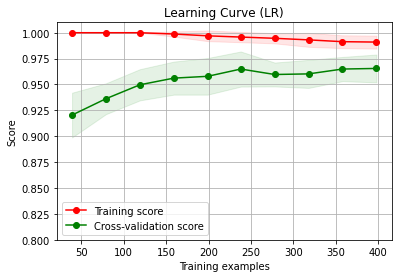

In [70]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors

title = "Learning Curve (LR)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = LogisticRegression(random_state=42, solver='liblinear',C=100, penalty='l1',)
plot_learning_curve(estimator, title, X, y, (0.8, 1.01), cv=cv, n_jobs=4)
plt.show()

## Fitting Graph

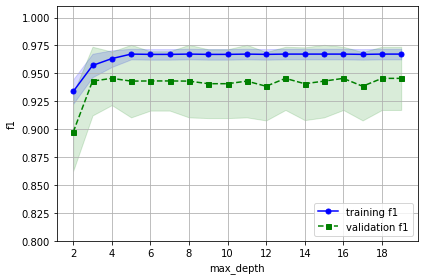

In [74]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

np.random.seed(42)

max_depth = range(2,20,1)
param_name = "max_depth"
param_range = max_depth

DTmodel = tree.DecisionTreeClassifier(criterion = 'entropy', 
                                      max_depth = 4, 
                                      min_samples_leaf = 9,
                                      min_samples_split = 2
                                     )  

# Determine training and test scores for varying parameter values.
train_scores, test_scores = validation_curve( 
                DTmodel, 
                X = X_train, 
                y = y_train, 
                param_name = param_name, # parameter C: Inverse of regularization strength; must be a positive float. Smaller values of paramter C specify stronger regularization.
                param_range = param_range,
                cv = 10,     #10-fold cross-validation
                scoring = 'f1_weighted',
                n_jobs = 4
) # Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training f1')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation f1')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
#plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('f1')
plt.ylim([0.8, 1.01]) # y limits in the plot

from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure



## ROC

In [75]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [77]:
# Logistic Regression Classifier
clf1 = LogisticRegression(penalty='l1', 
                          C=100,
                          random_state=42,
                          solver='liblinear')

# Decision Tree Classifier
clf2 = DecisionTreeClassifier(criterion = 'entropy', 
                              max_depth = 4, 
                              min_samples_leaf = 9,
                              min_samples_split = 2,
                              random_state=42
                             )

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree']
all_clf = [clf1, clf2]

#Cross - Validation
print('10-fold cross validation:\n')
# Note: We are assuming here that the data is standardized. For the homework, you need to make sure the data is standardized.
for clf, label in zip([clf1, clf2],clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.99 (+/- 0.01) [Logistic regression]
ROC AUC: 0.97 (+/- 0.03) [Decision tree]


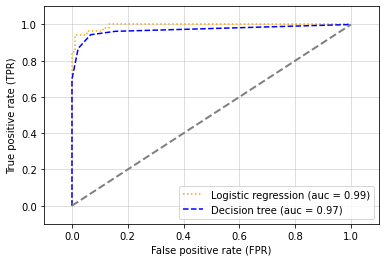

In [79]:
colors = [ 'orange', 'blue']      # Colors for visualization
linestyles = [':', '--', '-.', '-']        # Line styles for visualization

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()